In [1]:
import interfere
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.dpi"] = 200

## Deterministic

In [94]:
model = interfere.dynamics.Liping3DQuadFinance(sigma=0.0)
x0 = 3 * np.random.rand(3) - 1.5
t = np.linspace(0, 40, 4000)
X = model.simulate(x0, t)

g = interfere.PerfectIntervention(2, -0.1)
x_end = X[-1, :]
t_forecast = np.linspace(t[-1], 60, 2000)
X_do = model.simulate(x_end, t_forecast, g)

method = interfere.methods.VAR()
X_do_pred = method.counterfactual_forecast(X, t, t_forecast, g)

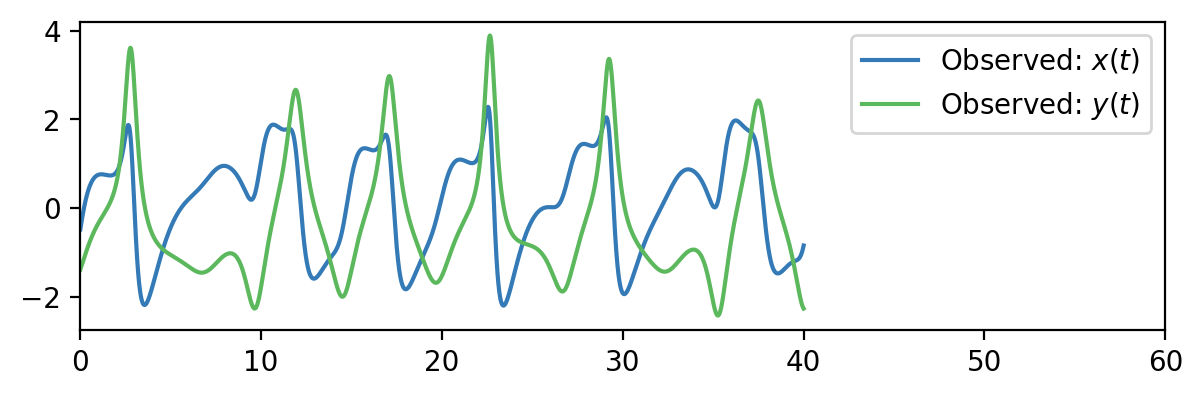

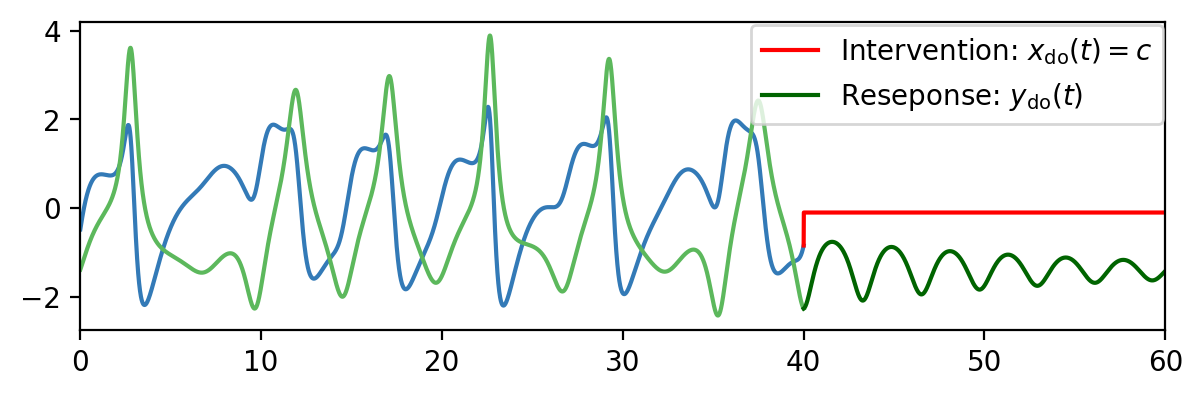

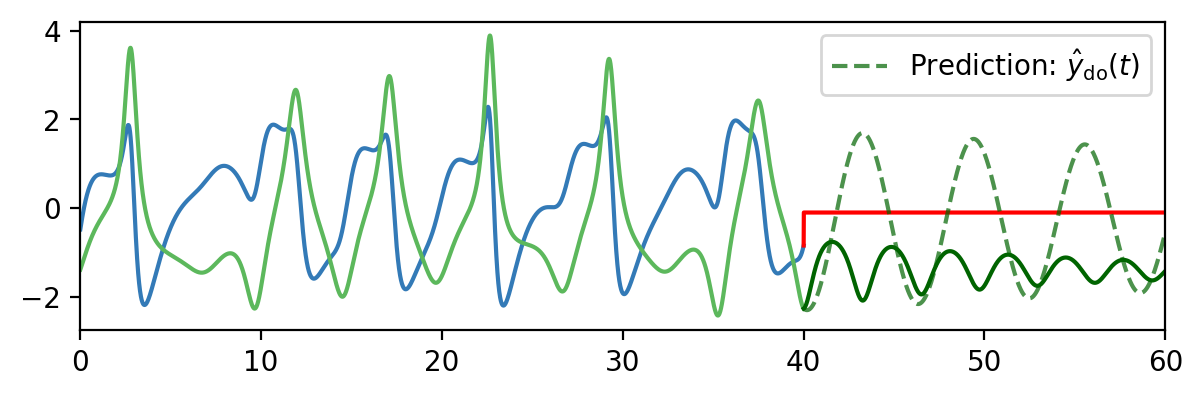

In [95]:
figsize = (7, 2)
x = X[:, 2]
y = X[:, 0]

x_do = X_do[:, 2]
y_do = X_do[:, 0]

y_do_pred = X_do_pred[:, 0]

x_color = "#337AB7"
y_color = "#5CB85C"

# Dynamics figure

plt.figure(figsize=figsize)
plt.plot(t, x, label="Observed: $x(t)$", c=x_color)
plt.plot(t, y, label="Observed: $y(t)$", c=y_color)
plt.xlim(0, 60)
plt.legend()
plt.show()

# Intervention figure

plt.figure(figsize=figsize)
plt.plot(t, x, c=x_color)
plt.plot(t, y, c=y_color)

x_do[0] = x[-1]
plt.plot(t_forecast, x_do, c="r", label="Intervention: $x_{\\text{do}}(t) = c$")
plt.plot(t_forecast, y_do, label="Reseponse: $y_{\\text{do}}(t)$", c="darkgreen")
plt.xlim(0, 60)
plt.legend(loc=(.618, .668))
plt.show()

# Prediction Figure

plt.figure(figsize=figsize)
plt.plot(t, x, c=x_color)
plt.plot(t, y, c=y_color)

x_do[0] = x[-1]
plt.plot(t_forecast, x_do, c="r")
plt.plot(t_forecast, y_do, c="darkgreen")

plt.plot(
    t_forecast,
    y_do_pred,
    "--",
    label="Prediction: $\\hat{y}_{\\text{do}}(t)$",
    c="darkgreen",
    alpha=0.7
)
plt.xlim(0, 60)
plt.legend()
plt.show()


## Stochastic

In [116]:
model = interfere.dynamics.Liping3DQuadFinance(sigma=0.25)
x0 = 3 * np.random.rand(3) - 1.5
t = np.linspace(0, 40, 4000)
X = model.simulate(x0, t)

g = interfere.PerfectIntervention(2, -0.1)
x_end = X[-1, :]
t_forecast = np.linspace(t[-1], 60, 2000)
X_do = model.simulate(x_end, t_forecast, g)

method = interfere.methods.VAR()
X_do_pred = method.counterfactual_forecast(X, t, t_forecast, g)

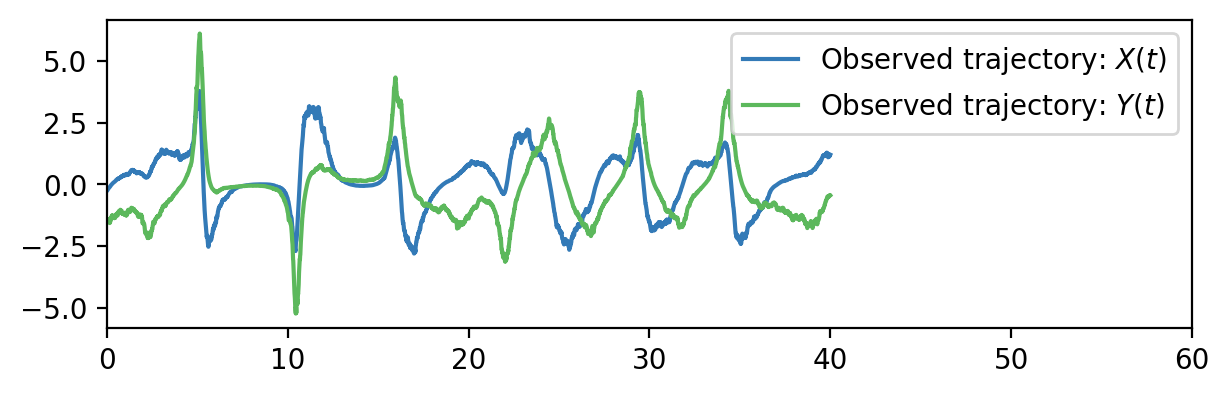

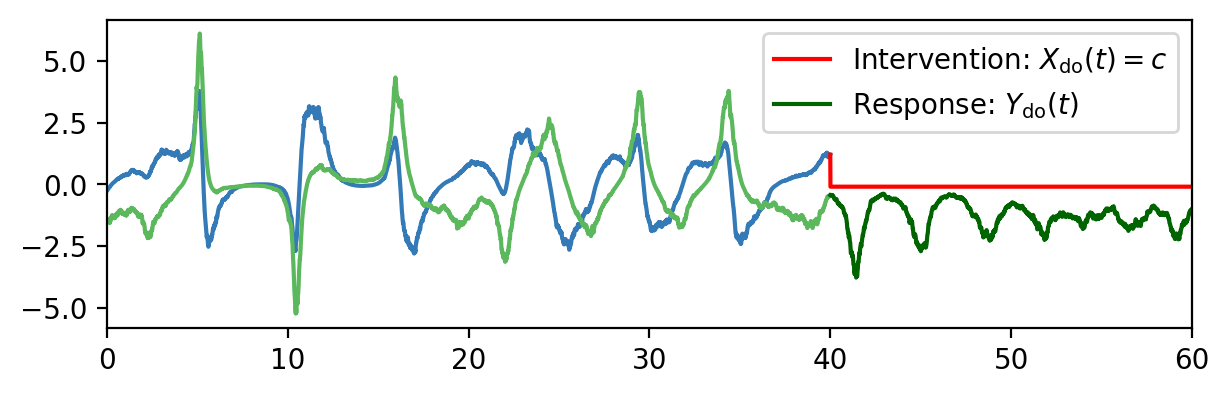

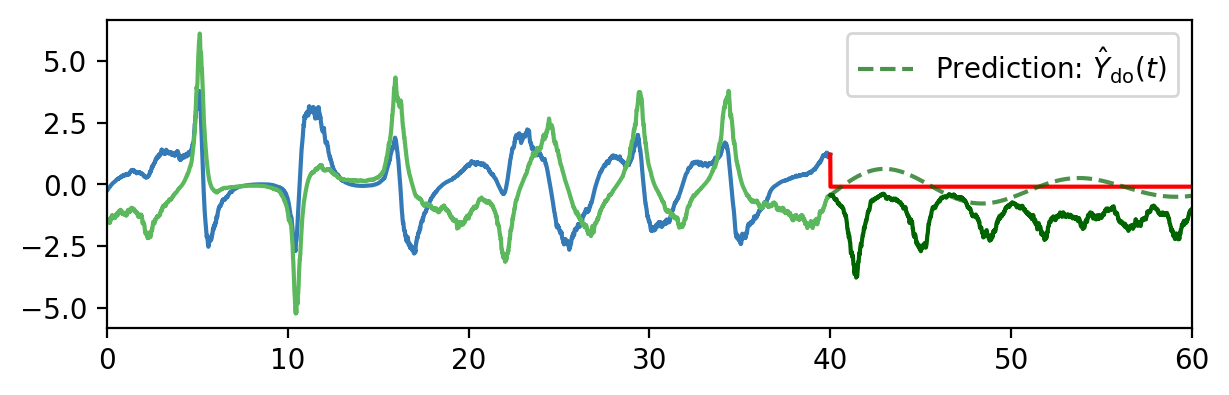

In [119]:
x = X[:, 2]
y = X[:, 0]

x_do = X_do[:, 2]
y_do = X_do[:, 0]

y_do_pred = X_do_pred[:, 0]

x_color = "#337AB7"
y_color = "#5CB85C"

# Dynamics figure

plt.figure(figsize=figsize)
plt.plot(t, x, label="Observed trajectory: $X(t)$", c=x_color)
plt.plot(t, y, label="Observed trajectory: $Y(t)$", c=y_color)
plt.xlim(0, 60)
plt.legend()
plt.show()

# Intervention figure

plt.figure(figsize=figsize)
plt.plot(t, x, c=x_color)
plt.plot(t, y, c=y_color)

x_do[0] = x[-1]
plt.plot(t_forecast, x_do, c="r", label="Intervention: $X_{\\text{do}}(t) = c $")
plt.plot(t_forecast, y_do, label="Response: $Y_{\\text{do}}(t)$", c="darkgreen")
plt.xlim(0, 60)
plt.legend()
plt.show()

# Prediction Figure

plt.figure(figsize=figsize)
plt.plot(t, x, c=x_color)
plt.plot(t, y, c=y_color)

x_do[0] = x[-1]
plt.plot(t_forecast, x_do, c="r")
plt.plot(t_forecast, y_do, c="darkgreen")

plt.plot(
    t_forecast,
    y_do_pred,
    "--",
    label="Prediction: $\\hat{Y}_{\\text{do}}(t)$",
    c="darkgreen",
    alpha=0.7
)
plt.xlim(0, 60)
plt.legend()
plt.show()


In [8]:
X[:, 2].shape

(4000,)

In [7]:
g = interfere.PerfectIntervention(1, 0.0)
x_end = X[-1, :]
t_forecast = np.linspace(t[-1], 50, 1000)
X_do = model.simulate(x_end, t_forecast, g)
plt.plot(t_forecast, X_do)

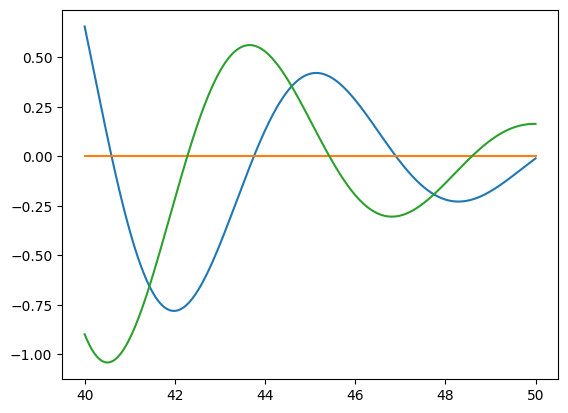